In [77]:
using Distributions
using StatsPlots
default(titlefontsize=10, fmt=:png)
using Random
using StatsBase
using QuadGK
using StaticArrays

name(dist::UnivariateDistribution) = replace(string(dist), r"{[^{.]*}"=>"")
beta_median(n) = (n += iseven(n); Beta((n+1)/2, (n+1)/2))

beta_median (generic function with 1 method)

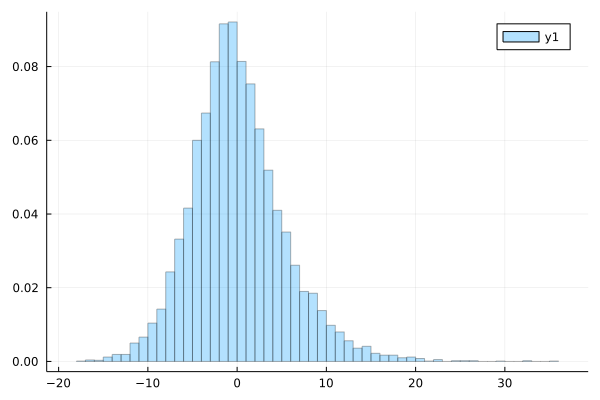

In [4]:
n = 10^4
X = rand(Gamma(2, 3), n)
Y = rand(Gamma(4, 1.5), n)
histogram(X - Y; norm=true, alpha=0.3)

mean(X - Y) = -0.0012419490224487475
var(X - Y) = 77.43961548608257
var(X) = 59.66156082774278
var(Y) = 17.57689479200277
var(X) + var(Y) = 77.23845561974555
var(X - Y) / (var(X) + var(Y)) = 1.0026044004210461


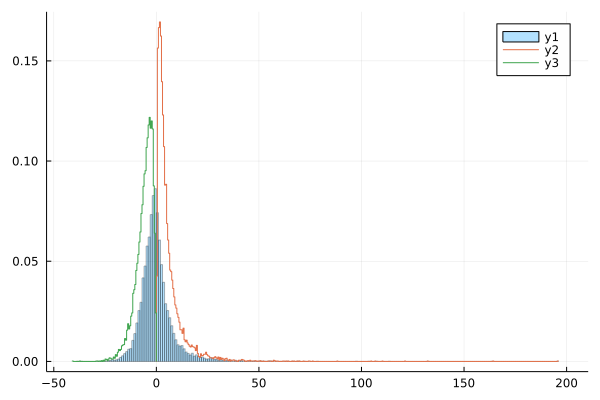

In [58]:
n = 10^4
X = rand(LogNormal(log(6)-1/2, 1), n)
Y = rand(Gamma(2, 3), n)
@show mean(X - Y)
@show var(X - Y) var(X) var(Y) var(X)+var(Y) var(X - Y)/(var(X)+var(Y))
histogram(X - Y; norm=true, alpha=0.3)
stephist!(X; norm=true)
stephist!(-Y; norm=true)

In [49]:
mean(LogNormal(log(6)-1/2, 1))

6.0

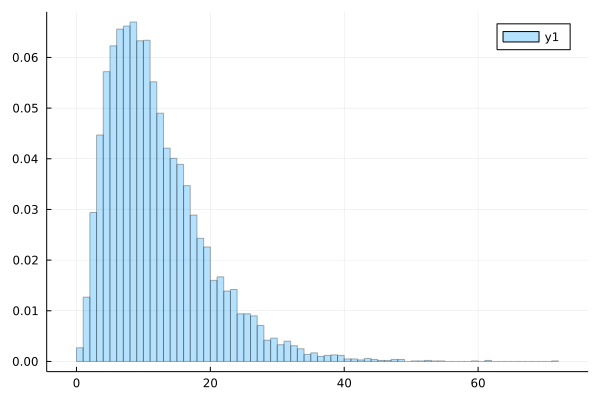

In [6]:
n = 10^4
X = rand(Gamma(1, 6), n)
Y = rand(Gamma(2, 3), n)
histogram(X + Y; norm=true, alpha=0.3)

median(dist) = 1.0
(mean(M), std(M)) = (1.0088241818248207, 0.12527839532610377)


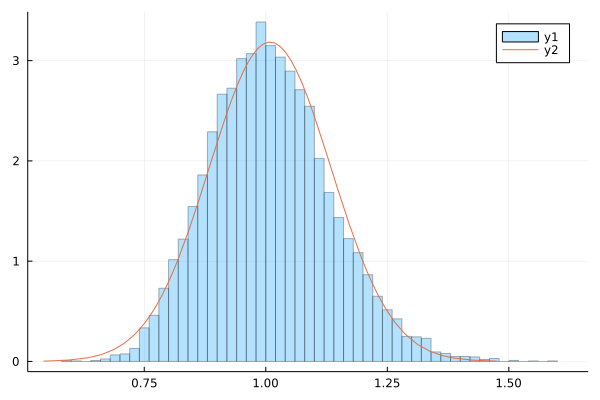

In [68]:
dist = LogNormal()
n = 100
L = 10^4
X = rand(dist, n, L)
M = median.(eachcol(X))

@show median(dist)
@show mean(M), std(M)

histogram(M; norm=true, alpha=0.3)
plot!(Normal(mean(M), std(M)))

median(dist) = 1.0
(mean(M), std(M)) = (1.0100817332796017, 0.12730772776328847)
std(beta_median(n)) / pdf(dist, median(dist)) = 0.12349271142341854


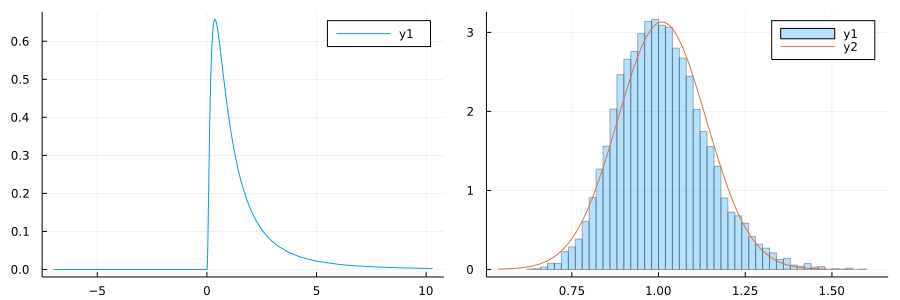

In [106]:
#dist = MixtureModel([Normal(), Normal(3)], [0.5, 0.5])
#dist = Normal()
dist = LogNormal()

n = 100
L = 10^4
X = rand(dist, n, L)
M = median.(eachcol(X))

@show median(dist)
@show mean(M), std(M)
@show std(beta_median(n)) / pdf(dist, median(dist))

μ, σ = mean(dist), std(dist)
P1 = plot(x -> pdf(dist, x), μ - 4σ, μ + 4σ)
P2 = histogram(M; norm=true, alpha=0.3)
plot!(Normal(mean(M), std(M)))

plot(P1, P2; size=(900, 300))

In [108]:
ecdfX = ecdf(M)

ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}([0.6336592457083597, 0.645616026580937, 0.6539223635341891, 0.6610410260574358, 0.6678773965732108, 0.6692619271784976, 0.6750462181615778, 0.6756956345412286, 0.6764420701406373, 0.6801843792589622  …  1.4772295758238356, 1.4780997139994412, 1.4854577229768056, 1.5110756554296771, 1.5149410962050025, 1.5272725799147264, 1.5434858598066954, 1.5493727314337367, 1.5595654757828505, 1.5808685409745151], Float64[])

In [110]:
dump(ecdfX)

ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}
  sorted_values: Array{Float64}((10000,)) [0.6336592457083597, 0.645616026580937, 0.6539223635341891, 0.6610410260574358, 0.6678773965732108, 0.6692619271784976, 0.6750462181615778, 0.6756956345412286, 0.6764420701406373, 0.6801843792589622  …  1.4772295758238356, 1.4780997139994412, 1.4854577229768056, 1.5110756554296771, 1.5149410962050025, 1.5272725799147264, 1.5434858598066954, 1.5493727314337367, 1.5595654757828505, 1.5808685409745151]
  weights: Weights{Float64, Float64, Vector{Float64}}
    values: Array{Float64}((0,)) Float64[]
    sum: Float64 0.0


In [111]:
a = ecdf(Float64[1, 2, 3, 3, 4, 5, 6, 6, 6, 7, 8])

ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}([1.0, 2.0, 3.0, 3.0, 4.0, 5.0, 6.0, 6.0, 6.0, 7.0, 8.0], Float64[])

In [112]:
dump(a)

ECDF{Vector{Float64}, Weights{Float64, Float64, Vector{Float64}}}
  sorted_values: Array{Float64}((11,)) [1.0, 2.0, 3.0, 3.0, 4.0, 5.0, 6.0, 6.0, 6.0, 7.0, 8.0]
  weights: Weights{Float64, Float64, Vector{Float64}}
    values: Array{Float64}((0,)) Float64[]
    sum: Float64 0.0


In [294]:
function E_median!(f, X)
    n = length(X)
    ecdfX = ecdf(X)
    x = ecdfX.sorted_values
    beta = beta_median(n)
    s = f(x[1]) * cdf(beta, ecdfX(x[1]))
    s += sum(f(x[i]) * (cdf(beta, ecdfX(x[i])) - cdf(beta, ecdfX(x[i-1]))) for i in 2:n)
end

function var_median!(X)
    m = mean(X)
    f(x) = (x - m)^2
    E_median!(f, X)
end

var_median! (generic function with 1 method)

In [328]:
n = 100
X = rand(Uniform(), n)
E_median!(x -> (x - mean(X))^2, X), var_median!(X), var(beta_median(n))

(0.00494275998247955, 0.00494275998247955, 0.0024271844660194173)

In [393]:
function plot_etc(; distX = Uniform(-1, 1), distY = Uniform(-2, 2), m = 100, n = 200, L = 10^4)
    X = rand(distX, m, L)
    Y = rand(distY, n, L)
    
    MX = median.(eachcol(X))
    MY = median.(eachcol(Y))
    @time VMX = var_median!.(eachcol(X))
    @time VMY = var_median!.(eachcol(Y))

    @show median(distX)
    @show median(distY)
    @show mean(MX - MY)
    @show var(MX)
    @show var(MY)
    @show var(MX) + var(MY)
    @show var(MX - MY)
    @show a = var(beta_median(m)) / pdf(distX, median(distX))^2
    @show b = var(beta_median(n)) / pdf(distY, median(distY))^2
    @show a + b
    @show mean(VMX)
    @show mean(VMY)
    @show mean(VMX + VMY)

    @show median(VMX)
    @show median(VMY)

    @show gammaVMX = fit_mle(Gamma, VMX)
    @show gammaVMY = fit_mle(Gamma, VMY)
    @show 2*m^(1/4)
    @show 2*n^(1/4)
    @show mode(gammaVMX)
    @show mode(gammaVMY)

    P1 = stephist(VMX; norm=true, label="VMX")
    vline!([a]; label="a")
    vline!([var(MX)]; label="var(MX)")
    vline!([mean(VMX)]; c=1, label="mean(VMX)")
    vline!([median(VMX)]; c=1, label="median(VMX)", ls=:dash)
    vline!([mode(gammaVMX)]; c=1, label="mode(gammaVMX)", ls=:dashdot)
    plot!(gammaVMX, extrema(VMX)...; c=1, label="gammaVMX", ls=:dashdot)
    title!("$(name(distX)), m=$m")

    P2 = stephist(VMY; norm=true, label="VMY")
    vline!([b]; label="b")
    vline!([var(MY)]; label="var(MY)")
    vline!([mean(VMY)]; c=1, label="mean(VMY)")
    vline!([median(VMY)]; c=1, label="median(VMY)", ls=:dash)
    vline!([mode(gammaVMY)]; c=1, label="mode(gammaVMY)", ls=:dashdot)
    plot!(gammaVMY, extrema(VMY)...; c=1, label="gammaVMY", ls=:dashdot)
    title!("$(name(distY)), n=$n")

    plot(P1, P2; size=(900, 300))
end

plot_etc (generic function with 1 method)

  0.610254 seconds (169.50 k allocations: 22.881 MiB)
  2.770059 seconds (169.50 k allocations: 69.268 MiB, 0.28% gc time)
median(distX) = 0.0
median(distY) = 0.0
mean(MX - MY) = -0.0015629785002357149
var(MX) = 0.009855313075583067
var(MY) = 0.009915735885991608
var(MX) + var(MY) = 0.019771048961574673
var(MX - MY) = 0.0195591200472784
a = var(beta_median(m)) / pdf(distX, median(distX)) ^ 2 = 0.009708737864077669
b = var(beta_median(n)) / pdf(distY, median(distY)) ^ 2 = 0.009925558312655087
a + b = 0.019634296176732756
mean(VMX) = 0.012779109072117252
mean(VMY) = 0.01316885206856187
mean(VMX + VMY) = 0.02594796114067912
median(VMX) = 0.01179555564076829
median(VMY) = 0.012177422232640102
gammaVMX = fit_mle(Gamma, VMX) = Gamma{Float64}(α=5.516261247858457, θ=0.002316625065043541)
gammaVMY = fit_mle(Gamma, VMY) = Gamma{Float64}(α=7.3758100136789, θ=0.0017854109642384253)
2 * m ^ (1 / 4) = 6.324555320336759
2 * n ^ (1 / 4) = 8.94427190999916
mode(gammaVMX) = 0.010462484007073723
mode(gam

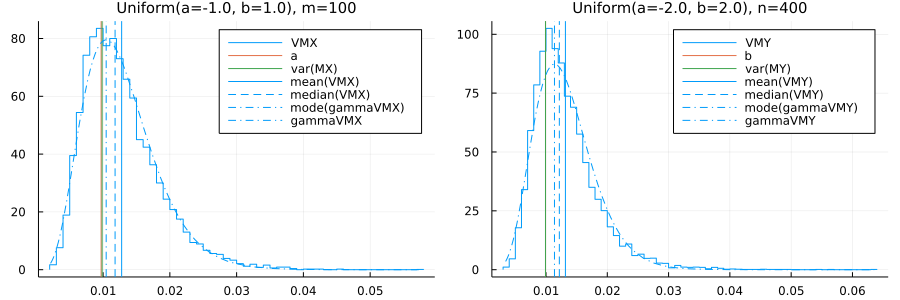

In [394]:
plot_etc(; distX = Uniform(-1, 1), distY = Uniform(-2, 2), m = 100, n = 400)

  0.623263 seconds (169.50 k allocations: 22.881 MiB)
  2.789458 seconds (169.50 k allocations: 69.268 MiB, 0.22% gc time)
median(distX) = 0.5
median(distY) = 0.5
mean(MX - MY) = 0.0007662266310788981
var(MX) = 0.0024435198601000323
var(MY) = 0.0006192630199749154
var(MX) + var(MY) = 0.003062782880074948
var(MX - MY) = 0.0030903731552796186
a = var(beta_median(m)) / pdf(distX, median(distX)) ^ 2 = 0.0024271844660194173
b = var(beta_median(n)) / pdf(distY, median(distY)) ^ 2 = 0.0006203473945409429
a + b = 0.00304753186056036
mean(VMX) = 0.0031796258851368286
mean(VMY) = 0.0008257172027884671
mean(VMX + VMY) = 0.004005343087925296
median(VMX) = 0.002935016705362304
median(VMY) = 0.0007679578866329859
gammaVMX = fit_mle(Gamma, VMX) = Gamma{Float64}(α=5.623667898105868, θ=0.0005654007211570532)
gammaVMY = fit_mle(Gamma, VMY) = Gamma{Float64}(α=7.514912260729815, θ=0.00010987715812776185)
2 * m ^ (1 / 4) = 6.324555320336759
2 * n ^ (1 / 4) = 8.94427190999916
mode(gammaVMX) = 0.002614225163

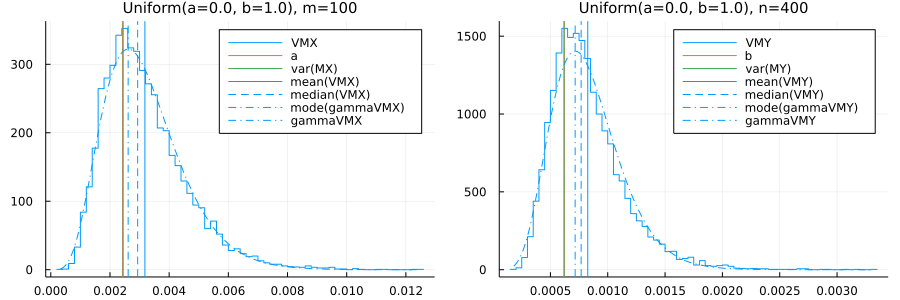

In [395]:
plot_etc(; distX = Uniform(), distY = Uniform(), m = 100, n = 400)

  0.585644 seconds (169.50 k allocations: 22.881 MiB)
  2.822974 seconds (169.50 k allocations: 69.268 MiB, 0.31% gc time)
median(distX) = 0.0
median(distY) = 0.0
mean(MX - MY) = -0.00015121870336685527
var(MX) = 0.01535361653577313
var(MY) = 0.0038396036287756587
var(MX) + var(MY) = 0.019193220164548788
var(MX - MY) = 0.019388898568337237
a = var(beta_median(m)) / pdf(distX, median(distX)) ^ 2 = 0.015250449774707731
b = var(beta_median(n)) / pdf(distY, median(distY)) ^ 2 = 0.00389775763472679
a + b = 0.01914820740943452
mean(VMX) = 0.021229366294334154
mean(VMY) = 0.0053139966896815025
mean(VMX + VMY) = 0.02654336298401565
median(VMX) = 0.01934145838988607
median(VMY) = 0.004886632012615268
gammaVMX = fit_mle(Gamma, VMX) = Gamma{Float64}(α=5.186050326041993, θ=0.004093551924810644)
gammaVMY = fit_mle(Gamma, VMY) = Gamma{Float64}(α=6.9207221861649435, θ=0.0007678384634922352)
2 * m ^ (1 / 4) = 6.324555320336759
2 * n ^ (1 / 4) = 8.94427190999916
mode(gammaVMX) = 0.017135814369523425
mo

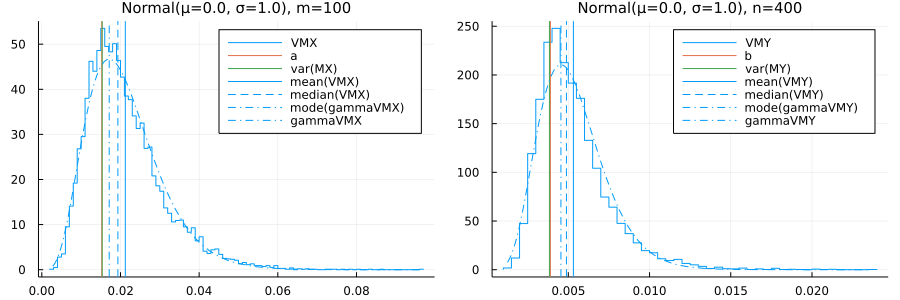

In [396]:
plot_etc(; distX = Normal(), distY = Normal(), m = 100, n = 400)

  0.586107 seconds (169.50 k allocations: 22.881 MiB)
  2.768078 seconds (169.50 k allocations: 69.268 MiB, 0.23% gc time)
median(distX) = 1.678346990016661
median(distY) = 1.678346990016661
mean(MX - MY) = 0.0007676393152413725
var(MX) = 0.025501586907963825
var(MY) = 0.006421247445767342
var(MX) + var(MY) = 0.031922834353731167
var(MX - MY) = 0.032020955725179476
a = var(beta_median(m)) / pdf(distX, median(distX)) ^ 2 = 0.024724809200810233
b = var(beta_median(n)) / pdf(distY, median(distY)) ^ 2 = 0.0063192440389167595
a + b = 0.031044053239726994
mean(VMX) = 0.1341200932313443
mean(VMY) = 0.11120378021712252
mean(VMX + VMY) = 0.24532387344846684
median(VMX) = 0.12358462964505429
median(VMY) = 0.10805046657963194
gammaVMX = fit_mle(Gamma, VMX) = Gamma{Float64}(α=4.431872878548808, θ=0.030262621899764718)
gammaVMY = fit_mle(Gamma, VMY) = Gamma{Float64}(α=11.029563414441972, θ=0.010082337445153376)
2 * m ^ (1 / 4) = 6.324555320336759
2 * n ^ (1 / 4) = 8.94427190999916
mode(gammaVMX) = 

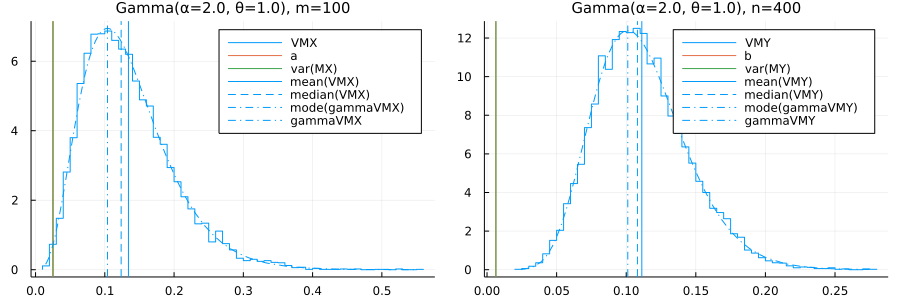

In [397]:
plot_etc(; distX = Gamma(2, 1), distY = Gamma(2, 1), m = 100, n = 400)

  0.598068 seconds (169.50 k allocations: 22.881 MiB)
  2.787727 seconds (169.50 k allocations: 69.268 MiB, 0.25% gc time)
median(distX) = 1.0
median(distY) = 1.0
mean(MX - MY) = 0.006742951452697958
var(MX) = 0.016030908300673528
var(MY) = 0.0039227664580838515
var(MX) + var(MY) = 0.01995367475875738
var(MX - MY) = 0.020091827848962802
a = var(beta_median(m)) / pdf(distX, median(distX)) ^ 2 = 0.015250449774707731
b = var(beta_median(n)) / pdf(distY, median(distY)) ^ 2 = 0.00389775763472679
a + b = 0.01914820740943452
mean(VMX) = 0.45158100713302
mean(VMY) = 0.4282863351709184
mean(VMX + VMY) = 0.8798673423039385
median(VMX) = 0.3956142546312363
median(VMY) = 0.41230132659981455
gammaVMX = fit_mle(Gamma, VMX) = Gamma{Float64}(α=3.608857733782136, θ=0.12513128542192692)
gammaVMY = fit_mle(Gamma, VMY) = Gamma{Float64}(α=13.032068574370467, θ=0.0328640332673823)
2 * m ^ (1 / 4) = 6.324555320336759
2 * n ^ (1 / 4) = 8.94427190999916
mode(gammaVMX) = 0.3264497217110939
mode(gammaVMY) = 0.39

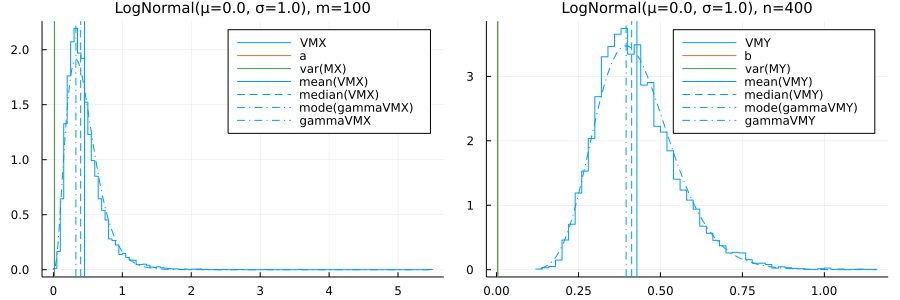

In [398]:
plot_etc(; distX = LogNormal(), distY = LogNormal(), m = 100, n = 400)

  0.595975 seconds (169.50 k allocations: 22.881 MiB)
  2.790474 seconds (169.50 k allocations: 69.268 MiB, 0.25% gc time)
median(distX) = 0.0
median(distY) = 0.0
mean(MX - MY) = 0.00027604108204299597
var(MX) = 0.01769027536755873
var(MY) = 0.0044353187505783214
var(MX) + var(MY) = 0.02212559411813705
var(MX - MY) = 0.022080343931516717
a = var(beta_median(m)) / pdf(distX, median(distX)) ^ 2 = 0.017208877767841586
b = var(beta_median(n)) / pdf(distY, median(distY)) ^ 2 = 0.004398298784336683
a + b = 0.02160717655217827
mean(VMX) = 0.02839266417886031
mean(VMY) = 0.007101455943126271
mean(VMX + VMY) = 0.03549412012198658
median(VMX) = 0.024655351694797732
median(VMY) = 0.006095130625346084
gammaVMX = fit_mle(Gamma, VMX) = Gamma{Float64}(α=3.976680284005035, θ=0.007139790516492108)
gammaVMY = fit_mle(Gamma, VMY) = Gamma{Float64}(α=4.602540873518573, θ=0.0015429425046468578)
2 * m ^ (1 / 4) = 6.324555320336759
2 * n ^ (1 / 4) = 8.94427190999916
mode(gammaVMX) = 0.021252873662368183
mode(

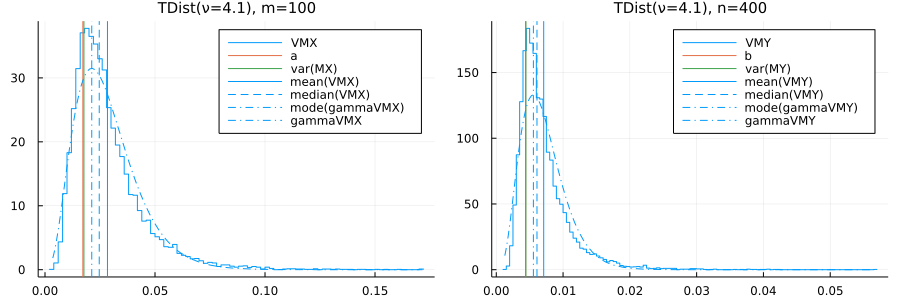

In [399]:
plot_etc(; distX = TDist(4.1), distY = TDist(4.1), m = 100, n = 400)